In [38]:
import numpy as np
import pandas as pd

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
bank_df=pd.read_csv("Banking Dataset.csv")

In [41]:
bank_df.head(5)

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9
1,C10,1,41,M,84370.59,SELF-EMP,14,41-45,843,9
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19
4,C10000,0,43,M,97100.48,SENP,3,41-45,397,8


In [42]:
bank_df.shape


(20000, 10)

In [43]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
Cust_ID           20000 non-null object
Target            20000 non-null int64
Age               20000 non-null int64
Gender            20000 non-null object
Balance           20000 non-null float64
Occupation        20000 non-null object
No_OF_CR_TXNS     20000 non-null int64
AGE_BKT           20000 non-null object
SCR               20000 non-null int64
Holding_Period    20000 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.5+ MB


In [44]:
for feature in bank_df.columns:
    if bank_df[feature].dtype=="object":
        bank_df[feature]=pd.Categorical(bank_df[feature]).codes

In [45]:
feature


'Holding_Period'

In [46]:
pd.Categorical(bank_df[feature]).codes

array([ 8,  8, 25, ..., 10, 19, 10], dtype=int8)

In [47]:
bank_df.head(5)

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,0,0,30,1,160378.60,1,2,0,826,9
1,1,1,41,1,84370.59,2,14,3,843,9
2,2,0,49,0,60849.26,0,49,4,328,26
3,3,0,49,1,10558.81,1,23,4,619,19
4,4,0,43,1,97100.48,3,3,3,397,8


In [48]:
X=bank_df.drop(["Target","Cust_ID"],axis=1)
y=bank_df.pop("Target")

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,train_labels,test_labels=train_test_split(X,y,test_size=0.30,random_state=1)

In [67]:
rfcl=RandomForestClassifier(n_estimators=501,oob_score=True,max_depth=10,max_features=5,min_samples_leaf=50,min_samples_split=110)

In [71]:
rfcl=rfcl.fit(X_train,train_labels)

In [72]:
rfcl.oob_score_

0.9152857142857143

In [74]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid={'max_depth':[7,10],
            'max_features':[4,6],
            'min_samples_leaf':[50,100],
            'min_samples_split':[150,300],
            'n_estimators':[301,501]}

In [79]:
rfcl=RandomForestClassifier()

In [80]:
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [81]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [82]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=301,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
best_grid=grid_search.best_estimator_

In [84]:
ytrain_predict=best_grid.predict(X_train)

In [85]:
ytest_predict=best_grid.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix,classification_report

In [87]:
confusion_matrix(train_labels,ytrain_predict)

array([[12752,    30],
       [ 1149,    69]], dtype=int64)

In [88]:
confusion_matrix(test_labels,ytest_predict)

array([[5474,   11],
       [ 487,   28]], dtype=int64)

In [89]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12782
           1       0.70      0.06      0.10      1218

    accuracy                           0.92     14000
   macro avg       0.81      0.53      0.53     14000
weighted avg       0.90      0.92      0.88     14000



In [90]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5485
           1       0.72      0.05      0.10       515

    accuracy                           0.92      6000
   macro avg       0.82      0.53      0.53      6000
weighted avg       0.90      0.92      0.88      6000



In [91]:
import matplotlib.pyplot as plt

In [92]:
probs=best_grid.predict_proba(X_train)

In [93]:
probs=probs[:,1]

In [95]:
from sklearn.metrics import roc_auc_score

In [96]:
auc=roc_auc_score(train_labels,probs)

In [97]:
auc

0.826757545182971

In [98]:
from sklearn.metrics import roc_curve

In [99]:
fpr,tpr,thresholds=roc_curve(train_labels,probs)

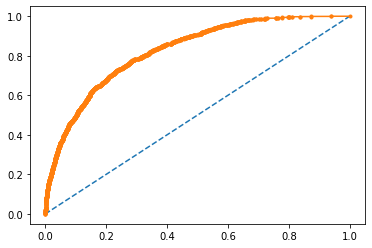

In [104]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

In [108]:
probs=best_grid.predict_proba(X_test)
probs=probs[:,1]
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(test_labels,probs)
auc

0.776506447416166

In [109]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test_labels,probs)

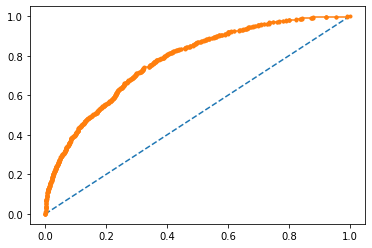

In [110]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()